mean squared error 1.23
r2 score 0.73


TypeError: object of type 'int' has no len()

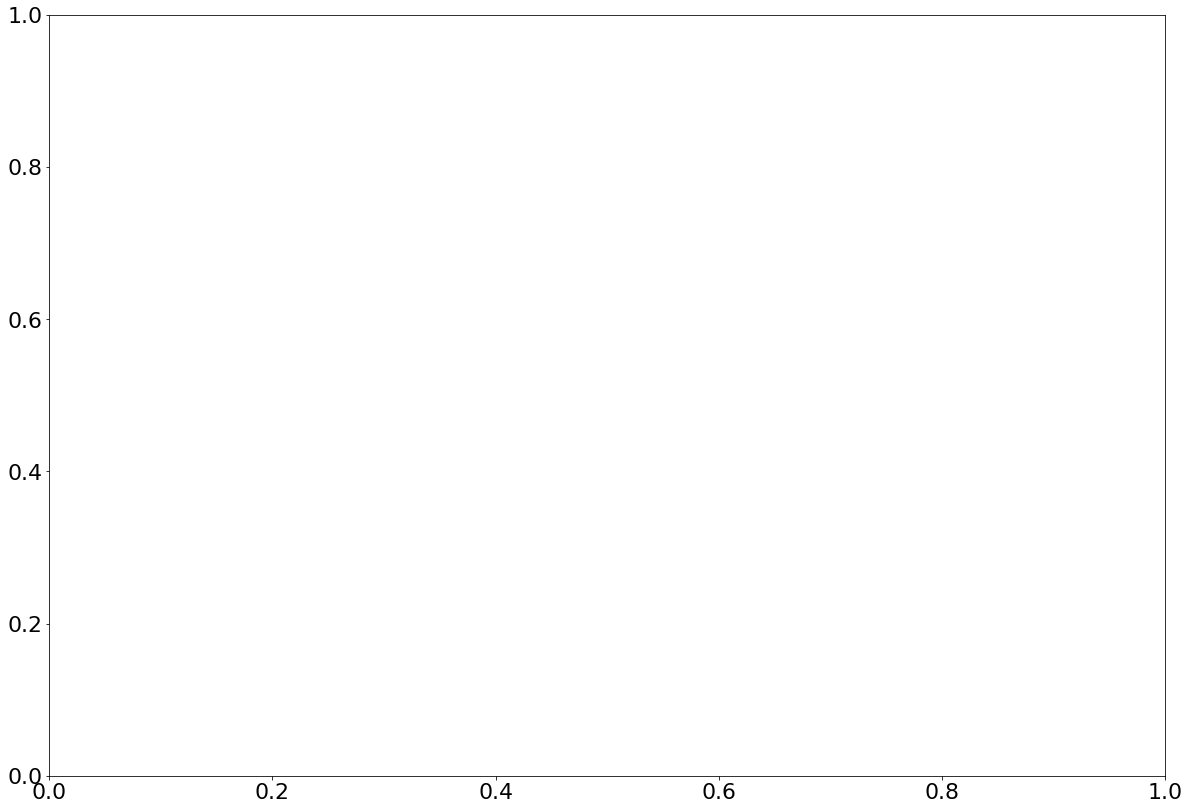

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# names of all the features in the dataset. There is probably a better way to do this
feature_names = ['name', 'hazType', 'Speed', 'x_dist', 'y_dist', 'sl_dist', 'angle', 'turn', 'signal_type', 'stop', 'action', 'RT']

# import the data
data = pd.read_csv("data_2020-03-28-engg6500projectNoNANs.csv", header =0, index_col=0, names=feature_names)

# from the feature selection code, these were the choosen variables. 
X = data.filter(['Speed', 'x_dist', 'y_dist', 'sl_dist', 'angle'],axis=1)

# response time is what we are trying to perdict
y = data["RT"]

# split into training and testing
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=0)

# scaling the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

    # Least squares Linear Regression.
regr = LinearRegression()

    # Train the model using the training sets
regr.fit(X_train_scaled, y_train)

    # Make predictions using the testing set
y_pred = regr.predict(X_test_scaled)

#  just some metrics to show how good the model is
print("mean squared error %.2f" % mean_squared_error(y_test, y_pred))
print("r2 score %.2f" %r2_score(y_test, y_pred))

outputs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# # print(df)

# too much data for 1 plot, so only first 50 samples comparing actual value vs. predicted
output= outputs.head(25)
plt.rcParams.update({'font.size': 22})

output.plot(kind='bar',figsize=(20,14), color=[0,0.5])
plt.xlabel("Participant Codes")
plt.ylabel("Driver Response Time (seconds)")
plt.show()